# Text classification (Naive Bayes) - Daniel Buerger

### Libraries Import and Reading data

In [4]:
import nltk
import pandas as pd
import numpy as np

data = pd.read_csv('Spam_data.csv', sep='\t', names=['label','text'])
print(data.head(n = 10))

  label                                               text
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...
5  spam  FreeMsg Hey there darling it's been 3 week's n...
6   ham  Even my brother is not like to speak with me. ...
7   ham  As per your request 'Melle Melle (Oru Minnamin...
8  spam  WINNER!! As a valued network customer you have...
9  spam  Had your mobile 11 months or more? U R entitle...


### Basic Data exploration

In [11]:
data.describe()

,label,text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
label    5572 non-null object
text     5572 non-null object
dtypes: object(2)
memory usage: 87.1+ KB


In [13]:
data.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

### New Feature

In [5]:
data['text_len'] = data['text'].apply(len)

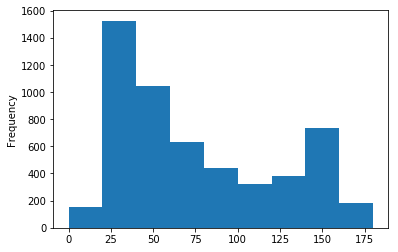

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Make bins of size 20, from 0 to 200
bins = range(0, 200, 20)
data['text_len'].plot.hist(bins=bins)

#### We can see the the majority (over 1400) of the texts have lengths between 20 to 40

In [39]:
print(data.text.loc[1])
len(data.text.loc[1])

Ok lar... Joking wif u oni...


29

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000024671722E80>,
      dtype=object)

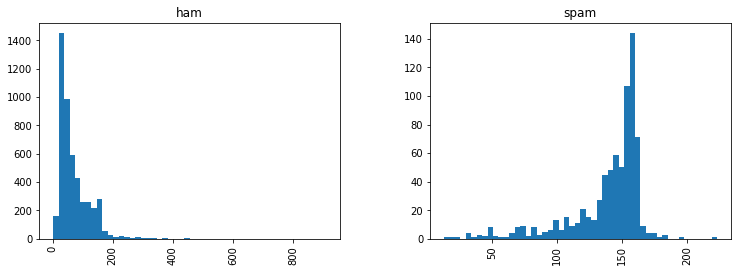

In [43]:
data.hist(column='text_len', by='label', bins=50, figsize=(12,4))

#### We can see that lhighest number of spam texts have character length between 150 and 170.
#### but most of the ham texts have texts character length between 20 to 50.
#### telling us that ham messages are in general much shorter.

In [53]:
pass

## Frequency distribution of the top 50 most common words in the texts

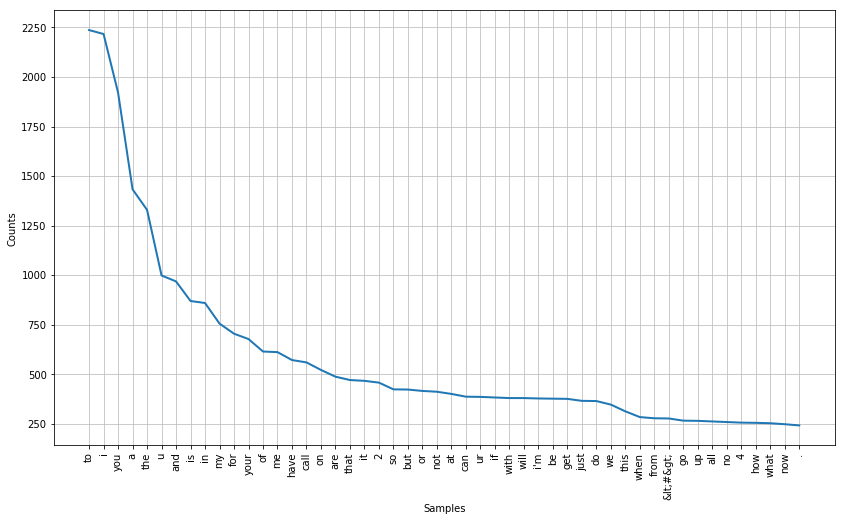

In [8]:
import string

plt.figure(figsize=(14,8))
txt = " ".join(data['text']) # make a string of all the strings joing by space.
words = txt.translate(string.punctuation).lower().split() # ignore punctuations and tokenize by splitting on space character.
fd = nltk.FreqDist(words) # Make a dictionary with words as keys and their frequency as dictionary values.
fd.plot(50, cumulative = False) # Plot a frequency plot

### most common words are stop words as expected

In [60]:
fd.most_common(10)

[('to', 2237),
 ('i', 2217),
 ('you', 1921),
 ('a', 1433),
 ('the', 1329),
 ('u', 998),
 ('and', 968),
 ('is', 869),
 ('in', 859),
 ('my', 755)]

## Tokenization with Regrex, without NLTK

In [9]:
from nltk.corpus import stopwords
import re

word_list=[]

i=0

# Iterating through each text
for txt in data['text']:
    
    # splits txt into words, drop any non-alphabet characters
     w_list = re.sub(r'[^a-z]',' ', txt.lower()).split() 
    
    # add another columns with tokens of that text as features
     data.loc[i, 'text1'] = ' '.join(w_list) 
        
    # Remove stopwords from w_list
     w_list = [w for w in w_list if w not in stopwords.words('english')] 
    
    # List of all the tokens without stopwords
     word_list += w_list 
    
    # Incrementing the index variable
     i += 1

data.head()

,label,text,text_len,text1
0,ham,"Go until jurong point, crazy.. Available only ...",111,go until jurong point crazy available only in ...
1,ham,Ok lar... Joking wif u oni...,29,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entry in a wkly comp to win fa cup final ...
3,ham,U dun say so early hor... U c already then say...,49,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,nah i don t think he goes to usf he lives arou...


## Classifier Algorithm 

In [10]:

all_words_fd = nltk.FreqDist(word_list)
word_common = all_words_fd.most_common(3000)
word_features = [w[0] for w in word_common]

print(word_common[0:5])
print(word_features[0:10])

[('u', 1228), ('call', 608), ('get', 397), ('ur', 391), ('gt', 318)]
['u', 'call', 'get', 'ur', 'gt', 'lt', 'ok', 'go', 'free', 'know']


In [19]:
def find_feature(document):
    features = {}
    words = document.split()
    for w in word_common:
        features[w[0]]=(w[0] in words) # true / false depending upon if common word found
    return features

Feature_set = []
for i, row in enumerate(data.values):
    label, text, text_len, text1 = row
    Feature_set.append((find_feature(text1), label))  


In [ ]:
# Feature set (list) for each text
# The list has 2 elements, first one is a dictionary of 3000 elements and the label for that text.

In [31]:
print(Feature_set[0][1])
print(len(Feature_set[0][0]))
Feature_set[0][0]


ham
3000


{'u': False,
 'call': False,
 'get': False,
 'ur': False,
 'gt': False,
 'lt': False,
 'ok': False,
 'go': True,
 'free': False,
 'know': False,
 'like': False,
 'good': False,
 'day': False,
 'got': True,
 'come': False,
 'time': False,
 'love': False,
 'send': False,
 'want': False,
 'text': False,
 'p': False,
 'txt': False,
 'n': True,
 'one': False,
 'going': False,
 'r': False,
 'need': False,
 'home': False,
 'stop': False,
 'lor': False,
 'k': False,
 'today': False,
 'sorry': False,
 'see': False,
 'still': False,
 'back': False,
 'da': False,
 'dont': False,
 'reply': False,
 'mobile': False,
 'take': False,
 'hi': False,
 'tell': False,
 'new': False,
 'please': False,
 'later': False,
 'pls': False,
 'think': False,
 'c': False,
 'phone': False,
 'week': False,
 'dear': False,
 'well': False,
 'night': False,
 'much': False,
 'great': True,
 'oh': False,
 'hope': False,
 'claim': False,
 'msg': False,
 'hey': False,
 'b': False,
 'happy': False,
 'wat': True,
 'give': False

In [32]:
for key, value in Feature_set[0][0].items():
    if value == True:
        print(key)

go
got
n
great
wat
e
world
available
crazy
point
la
bugis
cine
buffet


#### Splitting data into Training and Testing Dataset and fitting the model

In [33]:
train_set = Feature_set[:3000]
test_set = Feature_set[3000:]
classifier = nltk.NaiveBayesClassifier.train(train_set)

In [34]:
print(len(train_set))
print(len(test_set))

3000
2572


### Evaluation with Accuracy

In [81]:
print("Naive bayes algorithm accuracy percent: {:.3f}".format((nltk.classify.accuracy(classifier,test_set)) * 100))

Naive bayes algorithm accuracy percent: 98.250


In [82]:
classifier.show_most_informative_features(30)

Most Informative Features
                     www = True             spam : ham    =    238.1 : 1.0
                     box = True             spam : ham    =    166.5 : 1.0
                       p = True             spam : ham    =    135.6 : 1.0
                 service = True             spam : ham    =    128.5 : 1.0
                     txt = True             spam : ham    =     86.4 : 1.0
                landline = True             spam : ham    =     73.8 : 1.0
                     age = True             spam : ham    =     65.3 : 1.0
                    rate = True             spam : ham    =     65.3 : 1.0
                  mobile = True             spam : ham    =     62.6 : 1.0
                    code = True             spam : ham    =     61.1 : 1.0
                     win = True             spam : ham    =     59.7 : 1.0
                      po = True             spam : ham    =     56.9 : 1.0
                   video = True             spam : ham    =     48.5 : 1.0

## Predicting with our training Model

In [83]:
test_example = test_set[222][0]

for key, value in test_example.items():
    if (value): print(key)
        
print("\nPrediction =", classifier.classify(test_example))

call
mobile
please
number
thanks
x
tone
customer
ringtone
order
services
charged
reference
arrive

Prediction = spam


In [84]:
test_example = test_set[130][0]

for key, value in test_example.items():
    if (value): print(key)
        
print("\nPrediction =", classifier.classify(test_example))

way
could
late
haha
better
ever
swing

Prediction = ham


## Named Entity Recognition

#### Using NLTK's Chunk

In [46]:
sentence = 'Nick and Andrew are best friends and both work at Walmart'
ne_tree = nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize(sentence)))
iob_tagged = nltk.chunk.tree2conlltags(ne_tree)

for item in iob_tagged:
    if item[2] != 'O':
        print(item)

('Nick', 'NNP', 'B-PERSON')
('Andrew', 'NNP', 'B-PERSON')
('Walmart', 'NNP', 'B-ORGANIZATION')


#### Using Stanford NER Tagger

In [ ]:
from nltk.tag import StanfordNERTagger
from nltk.tokenize import word_tokenize

st = StanfordNERTagger   ('stanford-ner-model/classifiers/english.all.3class.distsim.crf.ser.gz',
                        'stanford-ner-model/stanford-ner.jar',
                        encoding='utf-8')

tokenized_text = word_tokenize(sentence)
classified_text = st.tag(tokenized_text)

for item in classified_text:
    if item[1] != 'O':
        print(item)

#### Ran stanford-ner-model

('Nick', 'NNP', 'B-PERSON')
('Andrew', 'NNP', 'B-PERSON')
('Walmart', 'NNP', 'B-ORGANIZATION')

## Edit Distance Implementation

In [31]:
def levenshteinDistance(s1, s2):
    if len(s1) > len(s2):
        s1, s2 = s2, s1

    distances = range(len(s1) + 1)
    for i2, c2 in enumerate(s2):
        distances_ = [i2 + 1 ]
        for i1, c1 in enumerate(s1):
            if c1 == c2:
                distances_.append(distances[i1])
            else:
                distances_.append(1 + min((distances[i1], distances[i1 + 1], distances_[-1])))
        distances = distances_
    return distances[-1]

print(levenshteinDistance("Python", "Pythonn")) # One deletion
print(levenshteinDistance("Python", "PythoEnn")) # One substitution, one Deletion
print(levenshteinDistance("Python", "Yythoms")) # Two Substitution, one deletion

1
2
3


# Cosine similarity

In [4]:
from scipy import spatial
from sklearn.metrics.pairwise import cosine_similarity

In [10]:
dataSetI = [3, 31161, 7, 2]
dataSetII = [2, 54, 13, 66413]

### Cosine Similarity using SciPy

In [6]:
result_scipy = 1 - spatial.distance.cosine(dataSetI, dataSetII)
result_scipy

0.005416318512227902

### Cosine Similarity using SK-Learn

In [18]:
datasetI_sk = np.array(dataSetI).reshape(1, -1)
datasetII_sk = np.array(dataSetII).reshape(1, -1)

result_sklearn = cosine_similarity(datasetI_sk, datasetII_sk)
result_sklearn[0][0].round(6)

0.000877

### Cosine Similarity by raw linear Algebra

In [43]:
def cos_sim(a, b):
    dot_product = np.dot(a, b)
    norm_a = np.linalg.norm(a)
    norm_b = np.linalg.norm(b)
    return dot_product / (norm_a * norm_b)

result_manual = cos_sim(np.array(dataSetI), np.array(dataSetII))
result_manual.round(6)

0.000877

## A Simple conversational interface for a chatbot system

In [2]:
def bot_logic(incomming):
    # crazy logic such as 
        # normalisatoin, 
        # vectorisation, 
        # NER, 
        # Calls to external APIs
        # Natural Language Generation NLG
        
        # One nice framework to autmate much of the above is to use, RASA-NLU
    
    reply = ''.join(reversed(incomming)) + ' bla bla'
    return reply

In [35]:
print("Chat with the System -- Enter 'Q' to quit.\n")

interaction_count = 1
while True:
    text = input("User: ").lower()
    if (text.lower().strip() == 'q'):
        break
    
    response = bot_logic(text)
       
    print("Bot: ", response, "\n")
    interaction_count += 1


Chat with the System -- Enter 'Q' to quit.

User: hi
Bot:  ih bla bla 

User: hello
Bot:  olleh bla bla 

User: q
